<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h1>Classification Model Development</h1>
<h4>Individual Assignment - Machine Learning</h4>
Camilla Bravi - student<br>
Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Preparation and Exploration</h2>
<br><h4>Importing and Loading the Dataset</h4><br>

We're importing all the necessary libraries and load our dataset from Excel to Python

In [582]:
# importing all the libraries
import pandas            as pd                       # data science essentials
import numpy             as np                       # numpy
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
import gender_guesser.detector as gender             # gender guesser
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots


# loading data
file = './GOT_character_predictions.xlsx'

got = pd.read_excel(io=file)


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the first 10 rows of the dataset
got.head(n = 10)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
5,6,Tommen Baratheon,NaN,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,1.000000,1
6,7,Valarr Targaryen,Hand of the King,Valyrian,183.0,NaN,NaN,NaN,House Targaryen,Kiera of Tyrosh,0,0,0,0,0,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,0
7,8,Viserys I Targaryen,NaN,NaN,NaN,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,0.678930,0
8,9,Wilbert,Ser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.006689,0
9,10,Wilbert Osgrey,Ser,NaN,NaN,NaN,NaN,NaN,House Osgrey,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.020067,1


In [583]:
got.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 433 non-null    float64
 5   mother                      21 non-null     object 
 6   father                      26 non-null     object 
 7   heir                        23 non-null     object 
 8   house                       1519 non-null   object 
 9   spouse                      276 non-null    object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

<h2>Checking for the missing values</h2>

Let's now find the misisng values in our dataset and imput them using the median


In [584]:
# Check for NANs values
nans = got.isna().sum()

In [585]:
nans[nans > 0]

title            1008
culture          1269
dateOfBirth      1513
mother           1925
father           1920
heir             1923
house             427
spouse           1670
isAliveMother    1925
isAliveFather    1920
isAliveHeir      1923
isAliveSpouse    1670
age              1513
dtype: int64

In [586]:
#imputing null variables with the median

fill = 0
got['title'] = got['title'].fillna(fill)

fill = 0
got['culture'] = got['culture'].fillna(fill)

fill = 0
got['dateOfBirth'] = got['dateOfBirth'].fillna(fill)

fill = 0
got['mother'] = got['mother'].fillna(fill)

fill = 0
got['father'] = got['father'].fillna(fill)

fill = 0
got['heir'] = got['heir'].fillna(fill)

fill = 0
got['house'] = got['house'].fillna(fill)

fill = 0
got['spouse'] = got['spouse'].fillna(fill)

fill = 0
got['isAliveMother'] = got['isAliveMother'].fillna(fill)

fill = 0
got['isAliveFather'] = got['isAliveFather'].fillna(fill)

fill = 0
got['isAliveHeir'] = got['isAliveHeir'].fillna(fill)

fill = 0
got['isAliveSpouse'] = got['isAliveSpouse'].fillna(fill)

fill = 0
got['age'] = got['age'].fillna(fill)

In [587]:
got.isnull().any(axis=0).any(axis=0)

False

<h2>Using the gender guesser</h2>

With this function we can have the number of men and women, based on their names


In [588]:
# guess gender based on (given) name

d = gender.Detector()

got['gender'] = got['name'].map(lambda x: d.get_gender(x))

In [589]:
got['gender'].value_counts()

unknown          1852
male               48
female             37
mostly_female       6
mostly_male         3
Name: gender, dtype: int64

In [590]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.10,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
    
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

<h2>Logistic Regression</h2>
<br><h4> We're now ready to proceed with the model building process.</h4><br>

<br>
<strong>A) Generation of the Pearson correlation</strong><br>

Among the response variable and the explanatory variables (rounded to two decimal places). 



In [591]:
df_corr = got.corr(method = 'pearson').round(decimals=2)

df_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
book4_A_Feast_For_Crows       0.27
age                           0.05
book5_A_Dance_with_Dragons    0.03
book3_A_Storm_Of_Swords       0.01
isAliveSpouse                -0.01
isNoble                      -0.04
isAliveFather                -0.04
isMarried                    -0.05
dateOfBirth                  -0.06
book2_A_Clash_Of_Kings       -0.07
isAliveHeir                  -0.08
isAliveMother                -0.12
S.No                         -0.13
book1_A_Game_Of_Thrones      -0.15
popularity                   -0.18
numDeadRelations             -0.19
Name: isAlive, dtype: float64

<br>
<strong>B) Stratifying the Response Variable</strong><br>

This will be useful to preserve the balance of the response variable



In [592]:
got.loc[ : ,'isAlive'].value_counts(normalize = True).round(decimals = 2)

1    0.75
0    0.25
Name: isAlive, dtype: float64

<br>
<strong>C) Preparing Explanatory and Response Data</strong><br>

Declare the explanatory variables as got_data and the response variable as got_target.


In [593]:
# declaring explanatory variables
got_data = got.drop('isAlive', axis = 1)


# declaring response variable
got_target = got.loc[ : , 'isAlive'] 

<br>
<strong>D) Prepare train-test split for statsmodels.</strong><br>

The stratified argument helps preserve the balance of the response variable in the training and testing sets.


In [594]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = got_target) # preserving balance


# merging training data for statsmodels
got_train = pd.concat([x_train, y_train], axis = 1)

In [595]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")





Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.74
0    0.26
Name: isAlive, dtype: float64



<br>
<strong>E) Build a Univariate Logistic Regression Model</strong><br>

We now build a logistic regression model in statsmodels using the explanatory variable that is most highly correlated with the response variable.

In [596]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """isAlive ~ book4_A_Feast_For_Crows""",
                           data = got_train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.534562
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Pseudo R-squared:  0.057     
Dependent Variable:  isAlive           AIC:               1876.0368 
Date:                2021-12-06 01:27  BIC:               1886.9727 
No. Observations:    1751              Log-Likelihood:    -936.02   
Df Model:            1                 LL-Null:           -992.53   
Df Residuals:        1749              LLR p-value:       2.1241e-26
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      6.0000                                         
--------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|  [0.025 0.975]
--------------------------------------------------------------------
Intercept               0.4601   0.0765  6.0172 0.0000 0.3102 0.6100
book4_A_Feast_For_Crows 1.1895   0.1141 10.4212 0.0000 0.9658 1.4132
====================================================================

"""

In [597]:
for val in got_data:
    print(f" {val} + ")

 S.No + 
 name + 
 title + 
 culture + 
 dateOfBirth + 
 mother + 
 father + 
 heir + 
 house + 
 spouse + 
 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords + 
 book4_A_Feast_For_Crows + 
 book5_A_Dance_with_Dragons + 
 isAliveMother + 
 isAliveFather + 
 isAliveHeir + 
 isAliveSpouse + 
 isMarried + 
 isNoble + 
 age + 
 numDeadRelations + 
 popularity + 
 gender + 


In [598]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ isAlive ~ dateOfBirth +
 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords + 
 book4_A_Feast_For_Crows + 
 book5_A_Dance_with_Dragons + 
 isAliveMother + 
 isAliveFather + 
 isAliveHeir + 
 isAliveSpouse + 
 isMarried + 
 isNoble + 
 age + 
 numDeadRelations + 
 popularity + 
 gender """,
                          data    = got_train)

# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.496589
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.124     
Dependent Variable:    isAlive             AIC:                 1779.0536 
Date:                  2021-12-06 01:27    BIC:                 1888.4124 
No. Observations:      1751                Log-Likelihood:      -869.53   
Df Model:              19                  LL-Null:             -992.53   
Df Residuals:          1731                LLR p-value:         1.9827e-41
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        9.0000                                             
--------------------------------------------------------------------------
                            Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
Intercept                   0.9569   0.4340  2.2050 0.0275  0.1064  1.8075
gender[T.male]              0.1040   0.5779  0.1799 0.8572 -1.0288  1.2367
gender[T.mostly_female]     0.3686   1.2795  0.2881 0.7733 -2.1392  2.8763
gender[T.mostly_male]      -2.0074   1.4552 -1.3795 0.1677 -4.8596  0.8447
gender[T.unknown]           0.0210   0.4365  0.0482 0.9616 -0.8346  0.8767
dateOfBirth                -0.0016   0.0006 -2.8500 0.0044 -0.0027 -0.0005
book1_A_Game_Of_Thrones    -0.5112   0.1589 -3.2181 0.0013 -0.8226 -0.1999
book2_A_Clash_Of_Kings     -0.2876   0.1416 -2.0308 0.0423 -0.5651 -0.0100
book3_A_Storm_Of_Swords    -0.2766   0.1444 -1.9158 0.0554 -0.5597  0.0064
book4_A_Feast_For_Crows     1.6354   0.1514 10.8028 0.0000  1.3387  1.9321
book5_A_Dance_with_Dragons -0.0438   0.1426 -0.3069 0.7589 -0.3233  0.2357
isAliveMother              -1.7393   0.8760 -1.9855 0.0471 -3.4561 -0.0224
isAliveFather               0.6838   1.3476  0.5074 0.6119 -1.9575  3.3251
isAliveHeir                -0.5110   0.7233 -0.7065 0.4799 -1.9287  0.9067
isAliveSpouse               0.7406   0.3579  2.0693 0.0385  0.0391  1.4420
isMarried                  -0.7511   0.3208 -2.3413 0.0192 -1.3799 -0.1223
isNoble                    -0.1983   0.1261 -1.5724 0.1158 -0.4456  0.0489
age                        -0.0016   0.0006 -2.8032 0.0051 -0.0026 -0.0005
numDeadRelations           -0.0796   0.0510 -1.5605 0.1186 -0.1796  0.0204
popularity                 -0.8699   0.5014 -1.7349 0.0828 -1.8527  0.1129
==========================================================================

"""

In [599]:
# instantiating a logistic regression model object
logit_full = smf.logit(formula = """ book4_A_Feast_For_Crows ~ dateOfBirth +
 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords + 
 book5_A_Dance_with_Dragons + 
 isAliveMother + 
 isAliveFather + 
 isAliveHeir + 
 isAliveSpouse + 
 isMarried + 
 isNoble + 
 age + 
 numDeadRelations + 
 popularity + 
 gender""",
                                     data    = got_train)


# fitting the model object
logit_full = logit_full.fit()


# checking the results SUMMARY
logit_full.summary2()

         Current function value: 0.549501
         Iterations: 35


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                                                                              Results: Logit
===========================================================================================================================================================================================================================================
Model:                                                                     Logit                                                                         Pseudo R-squared:                                                       0.189     
Dependent Variable:                                                        book4_A_Feast_For_Crows                                                       AIC:                                                                    1962.3536 
Date:                                                                      2021-12-06 01:27                                                              BIC:                                                                    2066.2445 
No. Observations:                                                          1751                                                                          Log-Likelihood:                                                         -962.18   
Df Model:                                                                  18                                                                            LL-Null:                                                                -1186.3   
Df Residuals:                                                              1732                                                                          LLR p-value:                                                            7.6151e-84
Converged:                                                                 0.0000                                                                        Scale:                                                                  1.0000    
No. Iterations:                                                            35.0000                                                                                                                                                         
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                             Coef.                             Std.Err.                              z    P>|z|                              [0.025                                                       0.975]                           
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                    -1.4118                                                       0.3978 -3.5493 0.0004                                                       -2.1914                                                      -0.6322
gender[T.male]                0.4689                                                       0.5117  0.9163 0.3595                                                       -0.5340                                                       1.4718
gender[T.mostly_female]       0.0845                                                       1.0754  0.0786 0.9374                                                       -2.0233                                                       2.1923
gender[T.mostly_male]         0.2524                                                       1.3523  0.1866 0.8520                                                       -2.3981                                                       2.9028
gender[T.unknown]             0.5989              

<br>
<strong>F) Running a logistic regression model</strong><br>

We now build a logistic regression model

In [600]:
# instantiating a logistic regression model object
logit_sig = smf.logit(formula = """ book4_A_Feast_For_Crows ~ dateOfBirth + 
book3_A_Storm_Of_Swords + book5_A_Dance_with_Dragons + age + popularity """,
                                            data    = got_train)


# fitting the model object
logit_sig = logit_sig.fit()


# checking the results SUMMARY
logit_sig.summary2()

Optimization terminated successfully.
         Current function value: 0.563682
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                Logit                   Pseudo R-squared: 0.168     
Dependent Variable:   book4_A_Feast_For_Crows AIC:              1986.0148 
Date:                 2021-12-06 01:27        BIC:              2018.8225 
No. Observations:     1751                    Log-Likelihood:   -987.01   
Df Model:             5                       LL-Null:          -1186.3   
Df Residuals:         1745                    LLR p-value:      6.0303e-84
Converged:            1.0000                  Scale:            1.0000    
No. Iterations:       6.0000                                              
--------------------------------------------------------------------------
                            Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
Intercept                  -0.7530   0.0802 -9.3937 0.0000 -0.9101 -0.5958
dateOfBirth                 0.0021   0.0005  3.8788 0.0001  0.0010  0.0032
book3_A_Storm_Of_Swords     1.3395   0.1140 11.7495 0.0000  1.1161  1.5629
book5_A_Dance_with_Dragons  1.2653   0.1207 10.4800 0.0000  1.0287  1.5019
age                         0.0021   0.0005  3.8823 0.0001  0.0010  0.0032
popularity                 -0.2019   0.4171 -0.4841 0.6283 -1.0195  0.6156
==========================================================================

"""

In [601]:
# explanatory sets from last session

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['isAlive','title','culture','mother', 'father', 'heir', 
                   'spouse', 'house'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['isAlive' ,  'age'],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : ['isAlive', 'age']

}

In [602]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


First Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig']}


Second Significant p-value Model:
---------------------------------
{candidate_dict['logit_sig_2']}
""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['isAlive', 'title', 'culture', 'mother', 'father', 'heir', 'spouse', 'house']


First Significant p-value Model:
--------------------------------
['isAlive', 'age']


Second Significant p-value Model:
---------------------------------
['isAlive', 'age']



In [603]:
# train/test split with the full model
got_data   =  got.loc[ : , candidate_dict['logit_sig']]
got_target =  got.loc[ : , 'book4_A_Feast_For_Crows']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = got_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, x_test).round(4) # accuracy

Training ACCURACY: 0.6591
Testing  ACCURACY: 0.6718


ValueError: Classification metrics can't handle a mix of multiclass-multioutput and binary targets

In [604]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[39 41]
 [23 92]]


In [605]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 39
False Positives: 41
False Negatives: 23
True Positives : 92



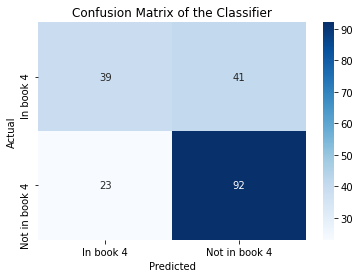

In [606]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['In book 4', 'Not in book 4'])

In [616]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.6438


In [617]:
# zipping each feature name to its coefficient
logreg_model_values = zip(got[candidate_dict['logit_sig_2']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', -0.54)
('isAlive', 1.23)
('age', -0.0)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h1>Classification Trees</h1>


In [618]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [619]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.6836
Full Tree Testing ACCURACY : 0.6769
Full Tree AUC Score: 0.6405


In [620]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 35
False Positives: 45
False Negatives: 18
True Positives : 97



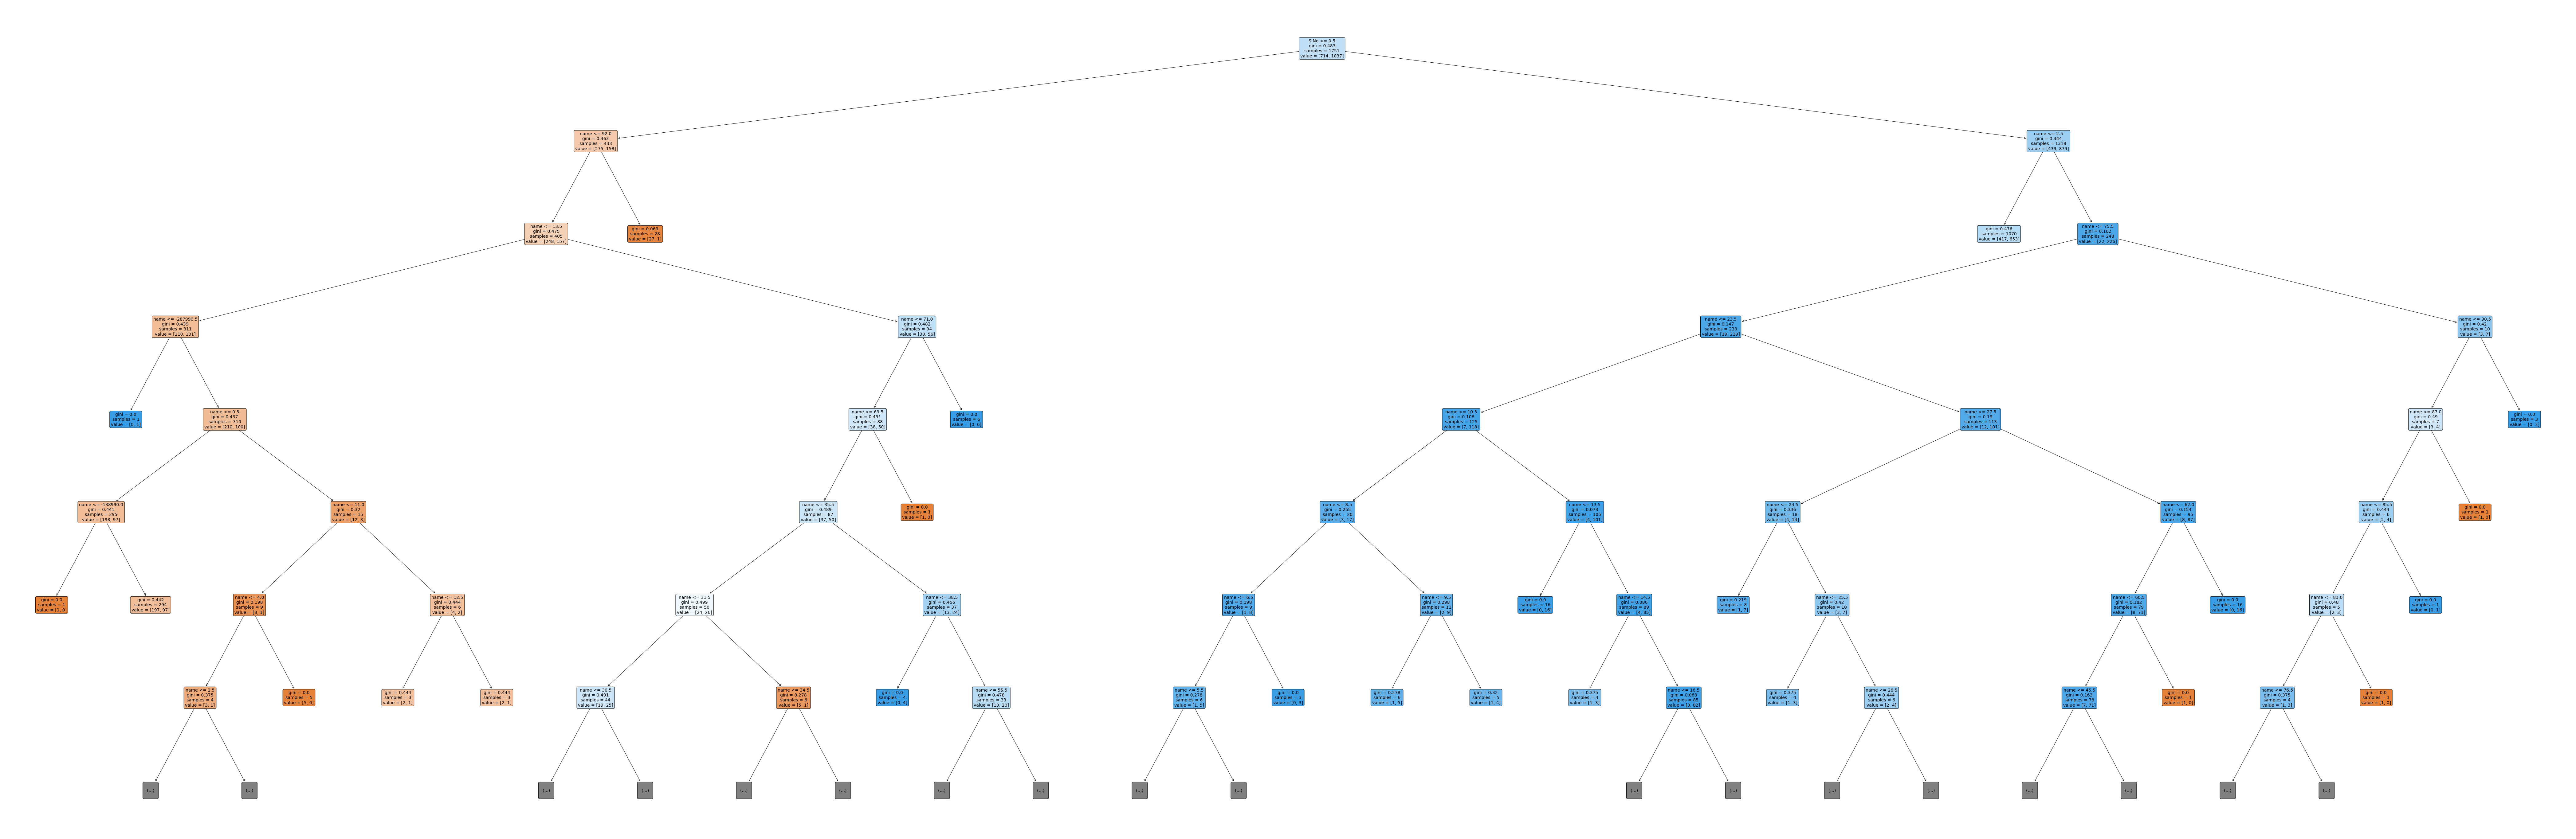

In [621]:
# setting figure size
plt.figure(figsize=(150,50))


# developing a plotted tree
plot_tree(decision_tree = full_tree_fit, 
          feature_names = got.columns,
          max_depth     = 7,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h1>K-Nearest Neighbors (KNN)</h1>


In [ ]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = got_data,
                                  y_data        = got_target,
                                  response_type = 'class')

In [ ]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(got_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(got_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            got_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = got_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h1>Random Forest</h1>

In [623]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  P

In [ ]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = 8,
                                    min_samples_split= 2,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [624]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.6802
Testing  ACCURACY: 0.6769
AUC Score        : 0.6405


In [625]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 35
False Positives: 45
False Negatives: 18
True Positives : 97



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h1>Gradient Boosted Models (GBM)</h1>


In [626]:
# importing necessary library

from sklearn.ensemble import GradientBoostingClassifier # gbm

# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 7,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.6836
Testing ACCURACY : 0.6718
AUC Score        : 0.6342


In [627]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 34
False Positives: 46
False Negatives: 18
True Positives : 97



<br>
<strong>Model chosen</strong><br>

My chosen model is the Classification Trees with the final AUC Score of 0.6405

In [628]:
print(f"""
        
Model name: Classification Trees 

---------------------------------------------
      
Training Accuracy: {full_tree_train_score}   
      
Testing Accuracy: {full_tree_test_score}
                          
AUC Score: {full_tree_auc_score}                  
                                                 
Confusion Matrix: {(full_tree_tn,
                    full_tree_fp, 
                    full_tree_fn, 
                    full_tree_tp)}

""")


        
Model name: Classification Trees 

---------------------------------------------
      
Training Accuracy: 0.6836   
      
Testing Accuracy: 0.6769
                          
AUC Score: 0.6405                  
                                                 
Confusion Matrix: (35, 45, 18, 97)


